# Sentimental analysis of Covid19 of time 

In [1]:
import tweepy as ty
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob



In [2]:
#Twitter API credentials, keys and tokens from the Twitter Dev Console 
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXX'


In [3]:
# create OAuthHandler object 
auth = ty.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret) 

# create API object to fetch tweets with auth info

api = ty.API(auth,wait_on_rate_limit=True) 

In [4]:
hashtag = "#covid19"
query = ty.Cursor(api.search, q=hashtag,lang = "en").items(1000)
tweets = [{'Tweets':tweet.text,'Timestamp':tweet.created_at}for tweet in query]




In [5]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,RT @artemis22: If you have compromised immunit...,2021-01-24 23:49:08
1,RT @SafetyGa: @bluestein This is so awful. The...,2021-01-24 23:49:07
2,RT @HeyDrWilson: That's great.\n\nIf you don't...,2021-01-24 23:49:07
3,RT @DrEricDing: SWITCH TO PREMIUM MASKS—I’ve b...,2021-01-24 23:49:05
4,As of Jan 23 the 7-day average of worldwide #C...,2021-01-24 23:49:05


In [6]:
import nltk
from nltk.corpus import stopwords

from textblob import Word, TextBlob


nltk.download("stopwords")
nltk.download("wordnet")
stop_words = stopwords.words("english")
custom_stopwords =["RT","#covid19"]



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/spandanagali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/spandanagali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#cleaning of the tweets : 
def clean_tweets(tweet, custom_stopwords):
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    tweet = re.sub(r':','',tweet)
    tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    clean_tweet = tweet
    clean_tweet.replace('[^\w\s]', '')
    
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in custom_stopwords)
    clean_tweet = " ".join(Word(word).lemmatize() for word in clean_tweet.split())
    return(clean_tweet)

df['clean Tweet'] = df['Tweets'].apply(lambda x: clean_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,clean Tweet
0,RT @artemis22: If you have compromised immunit...,2021-01-24 23:49:08,If compromised immunity please watch tweet fee...
1,RT @SafetyGa: @bluestein This is so awful. The...,2021-01-24 23:49:07,"This awful. There word ""leaders."" Sadly many B..."
2,RT @HeyDrWilson: That's great.\n\nIf you don't...,2021-01-24 23:49:07,That's great. If want wear mask #COVID19 pande...
3,RT @DrEricDing: SWITCH TO PREMIUM MASKS—I’ve b...,2021-01-24 23:49:05,SWITCH TO PREMIUM MASKS—I’ve saying months. We...
4,As of Jan 23 the 7-day average of worldwide #C...,2021-01-24 23:49:05,As Jan 23 7-day average worldwide #Covid19 dea...


In [8]:
# Sentimental analysis 
df['polarity'] = df['clean Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['clean Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['clean Tweet','polarity', 'subjectivity']].head(20)




,clean Tweet,polarity,subjectivity
0,If compromised immunity please watch tweet fee...,0.400000,0.800000
1,"This awful. There word ""leaders."" Sadly many B...",-0.250000,0.750000
2,That's great. If want wear mask #COVID19 pande...,1.000000,0.750000
3,SWITCH TO PREMIUM MASKS—I’ve saying months. We...,0.000000,0.000000
4,As Jan 23 7-day average worldwide #Covid19 dea...,-0.075000,0.233333
5,To say #COVID19 cause severe illness &amp; dea...,0.166667,0.333333
6,_helmer To #covidiots organizing anti-mask gat...,0.000000,0.000000
7,"The death Yassin Dabeh, 19 year old cleaner wo...",0.118182,0.350000
8,But long-term side effect COVID-19 vaccine? Su...,0.500000,0.888889
9,"This #EducationDay, I pay tribute resilience s...",0.000000,0.000000


In [9]:
#Word cloud
allWords = ''.join([twts for twts in df['clean Tweet']])
wordCloud=WordCloud(width = 1000, height=1000, random_state = 2, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show() #pop-out plot




NameError: name 'WordCloud' is not defined

In [10]:
# negative, positive and neutaral 
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Sentiment']= df['polarity'].apply(analysis)

df

,Tweets,Timestamp,clean Tweet,polarity,subjectivity,Sentiment
0,RT @artemis22: If you have compromised immunit...,2021-01-24 23:49:08,If compromised immunity please watch tweet fee...,0.400,0.800000,Positive
1,RT @SafetyGa: @bluestein This is so awful. The...,2021-01-24 23:49:07,"This awful. There word ""leaders."" Sadly many B...",-0.250,0.750000,Negative
2,RT @HeyDrWilson: That's great.\n\nIf you don't...,2021-01-24 23:49:07,That's great. If want wear mask #COVID19 pande...,1.000,0.750000,Positive
3,RT @DrEricDing: SWITCH TO PREMIUM MASKS—I’ve b...,2021-01-24 23:49:05,SWITCH TO PREMIUM MASKS—I’ve saying months. We...,0.000,0.000000,Neutral
4,As of Jan 23 the 7-day average of worldwide #C...,2021-01-24 23:49:05,As Jan 23 7-day average worldwide #Covid19 dea...,-0.075,0.233333,Negative
...,...,...,...,...,...,...
995,RT @DrEricDing: This is bad—Berlin has just pu...,2021-01-24 23:37:07,This bad—Berlin put entire hospital quarantine...,0.000,0.625000,Neutral
996,RT @MarishaRayLD: It is time the government un...,2021-01-24 23:37:05,It time government understands science math ac...,0.000,0.000000,Neutral
997,"RT @CTZebra: Seymour Doctor, 92yo Pet Therapy ...",2021-01-24 23:37:04,"Seymour Doctor, 92yo Pet Therapy HCW, Eustis, ...",0.000,0.000000,Neutral
998,RT @ZemanLynnZ: @kylegriffin1 WHY is Dr Birx t...,2021-01-24 23:37:04,"WHY Dr Birx telling u NOW; and, not, happening...",0.000,0.000000,Neutral


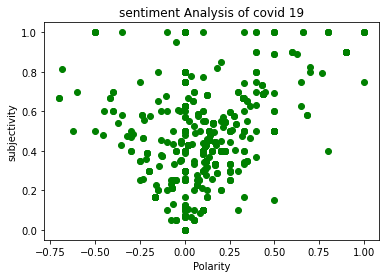

In [11]:
#plot

for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i],df['subjectivity'][i],color='Green')
    
plt.title('sentiment Analysis of covid 19')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()

In [12]:
# percentage of positive or negative 

positive_twt = df[df.Sentiment == 'Positive']
negative_twt = df[df.Sentiment == 'Negative']
neutral_twt = df[df.Sentiment == 'Neutral']

ppercent=round( (positive_twt.shape[0]/df.shape[0])*100,1)
npercent=round( (negative_twt.shape[0]/df.shape[0])*100,1)
nnpercent=round( (neutral_twt.shape[0]/df.shape[0])*100,1)

print("Positive :" + str(ppercent) + "%")
print("Negative :" + str(npercent) + "%")
print("Neutral :" + str(nnpercent) + "%")





Positive :41.0%
Negative :15.2%
Neutral :43.8%


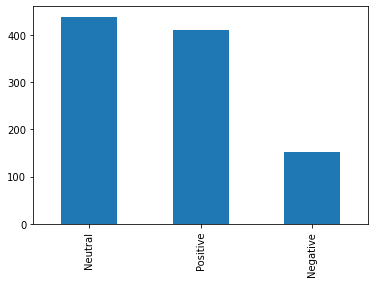

In [13]:
df['Sentiment'].value_counts()
df['Sentiment'].value_counts().plot(kind="bar")
plt.show()